In [ ]:
# What are we watching tonight?
# Which year(s) had the most highly rated shows?

In [1]:
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress


In [2]:
# File to Load (Remember to Change These)
full_dataset = Path("tv_shows.csv")

In [3]:
# Read and store into Pandas DataFrame
yearly_data_df = pd.read_csv(full_dataset)


In [4]:
# Organize DataFrame
organized_yearly_data_df = yearly_data_df.drop(["Unnamed: 0", "Type"], axis=1)
organized_yearly_data_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1
5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1
5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1
5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1


In [5]:
#Clean DataFrame of null values in IMDb and Rotten Tomatoes columns
cleaned_yearly_data_df = organized_yearly_data_df.dropna(subset=["IMDb", "Rotten Tomatoes"])
cleaned_yearly_data_df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5339,5687,Wild Chile,2018,7+,7.5/10,30/100,0,0,0,1
5340,5688,Howie Mandel's Animals Doing Things,2018,all,3.2/10,30/100,0,0,0,1
5341,5690,The Big Fib,2020,all,5.4/10,29/100,0,0,0,1
5342,5691,Vampirina: Ghoul Girls Rock!,2018,all,7.7/10,28/100,0,0,0,1


In [6]:
# Data conversion steps
def convert_fraction_to_integer(value):
    parts = value.split("/")
    numerator = float(parts[0])
    denominator = float(parts[1])
    result = round((numerator / denominator) * 100)
    return result

# Convert specific columns
columns_to_convert = ["IMDb", "Rotten Tomatoes"]

for col in columns_to_convert:
    cleaned_yearly_data_df[col] = cleaned_yearly_data_df[col].apply(convert_fraction_to_integer)

cleaned_yearly_data_df

C:\Users\richa\AppData\Local\Temp\ipykernel_21360\1367770718.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_yearly_data_df[col] = cleaned_yearly_data_df[col].apply(convert_fraction_to_integer)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,94,100,1,0,0,0
1,2,Stranger Things,2016,16+,87,96,1,0,0,0
2,3,Attack on Titan,2013,18+,90,95,1,1,0,0
3,4,Better Call Saul,2015,18+,88,94,1,0,0,0
4,5,Dark,2017,16+,88,93,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5339,5687,Wild Chile,2018,7+,75,30,0,0,0,1
5340,5688,Howie Mandel's Animals Doing Things,2018,all,32,30,0,0,0,1
5341,5690,The Big Fib,2020,all,54,29,0,0,0,1
5342,5691,Vampirina: Ghoul Girls Rock!,2018,all,77,28,0,0,0,1


In [15]:
highest_ratings_df = cleaned_yearly_data_df.loc[(cleaned_yearly_data_df["IMDb"] >= 80) & 
                                 (cleaned_yearly_data_df["Rotten Tomatoes"] >= 80)]
highest_ratings_df                           

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,94,100,1,0,0,0
1,2,Stranger Things,2016,16+,87,96,1,0,0,0
2,3,Attack on Titan,2013,18+,90,95,1,1,0,0
3,4,Better Call Saul,2015,18+,88,94,1,0,0,0
4,5,Dark,2017,16+,88,93,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5057,5376,Loki,2021,16+,85,95,0,0,0,1
5058,5377,The Mandalorian,2019,16+,88,94,0,0,0,1
5059,5379,WandaVision,2021,16+,80,89,0,0,0,1
5061,5382,Star Wars: The Clone Wars,2008,7+,83,85,0,0,0,1


In [27]:
yearly_count_imdb = highest_ratings_df.groupby("Year")["IMDb"].count().reset_index()
yearly_count_imdb

,Year,IMDb
0,1959,1
1,1966,1
2,1969,1
3,1987,1
4,1989,2
5,1990,2
6,1993,3
7,1995,2
8,1997,1
9,1998,1


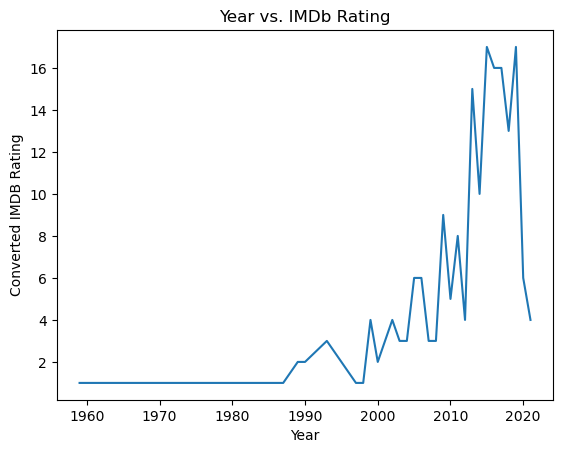

In [28]:
x_axis = yearly_count["Year"]
y_axis = yearly_count["IMDb"]

plt.plot(x_axis, y_axis)
plt.title("Year vs. IMDb Rating")
plt.xlabel("Year")
plt.ylabel("Converted IMDB Rating")
plt.show()
